# Wine customer segmentation

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars, belonging to three different customer segments. The analysis determined the quantities of 13 constituents found in each of the three types of wines.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
A = np.array(data)[:,1:].astype(np.float64).T # matrix containing the data (num features x num wines)
labels = np.array(data)[:,0].astype(np.int32) # the label of each wine (i.e. customer segment)
groups = (1,2,3) # customer segments: 1 = low quality; 2 = medium quality; 3 = high quality
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols',
            'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity',
            'Hue', 'OD280', 'Proline'] # features descriptions

# Questions

1. How many features? How many samples? How many samples belong to each customer segment?

In [ ]:
print('%d features' % A.shape[0])
print('%d samples'  % A.shape[1])
print('')

for g in groups:
  print('%d wines in customer segment #%s'% (np.sum(labels == g), g))

13 features
178 samples

59 wines in customer segment #1
71 wines in customer segment #2
48 wines in customer segment #3


2. Normalize the data so that each feature has zero mean and unitary standard deviation.

In [ ]:
A_norm = (A - np.mean(A, axis = 1)[:,None]) / np.std(A, axis = 1)[:,None]

3. Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Comment on the results.

Text(0.5, 1.0, 'Explained variance')

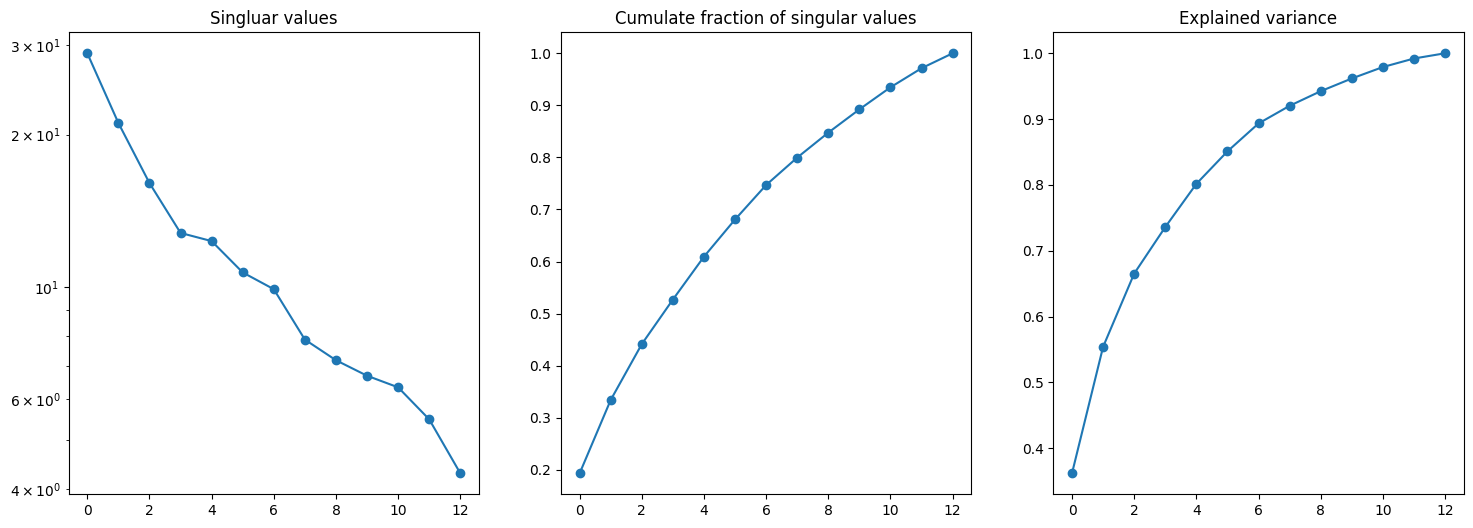

In [ ]:
U, s, VT = np.linalg.svd(A_norm, full_matrices = False)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o-')
axes[2].set_title('Explained variance')

3. Compute a matrix containing the principal components associated with the dataset.

In [ ]:
Phi = np.matmul(U.transpose(), A_norm)

In [ ]:
Phi.shape

(13, 178)

4. Generate a scatterplot of the first two principal components of the dataset, grouped by label. Draw a line that separates, as well as you manage, the category of low customer segment wines from the rest of the wines (chose intercept and slope of the line by hand, trying to achieve a good result).


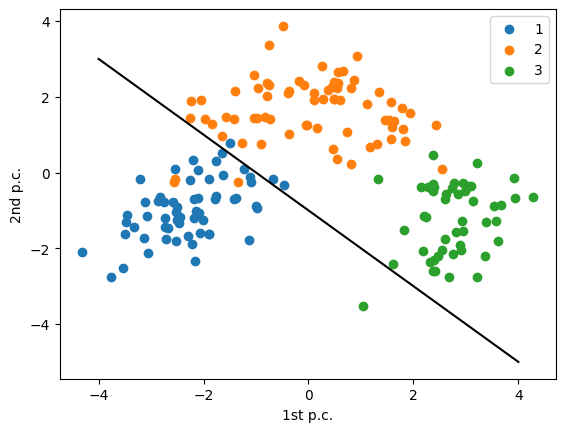

In [ ]:
for g in groups:
  plt.scatter(Phi[0, labels == g], Phi[1, labels == g], label = g)
plt.xlabel('1st p.c.')
plt.ylabel('2nd p.c.')
plt.legend()

m = -1
q = -1
x_values = np.linspace(-4, 4)
plt.plot(x_values, m*x_values + q, 'k-')

5. Based on the line of point 4, define a predictor to detect wines of low customer segment. Then, compute the number of true positives (TP), false positives (FP), true negatives (TN), false negatives (FN). Finally, compute
  - sensitivity: (TP) / (TP+FN)
  - specificity: (TN) / (TN+FP)
  - accuracy: (TP+TN) / (TP+TN+FP+FN)

In [ ]:
low_quality_predic = Phi[1, :] < m*Phi[0, :] + q
low_quality_actual = labels <= 1


TP = np.sum(np.logical_and(low_quality_predic == 1, low_quality_actual == 1))
FP = np.sum(np.logical_and(low_quality_predic == 0, low_quality_actual == 1))
TN = np.sum(np.logical_and(low_quality_predic == 0, low_quality_actual == 0))
FN = np.sum(np.logical_and(low_quality_predic == 1, low_quality_actual == 0))
print('true positives:  %d' % TP)
print('false positives: %d' % FP)
print('true negatives:  %d' % TN)
print('false negatives: %d' % FN)
print()
print('sensitivity: %2.1f%%' % (100 * (TP) / (TP+FN)))
print('specificity: %2.1f%%' % (100 * (TN) / (TN+FP)))
print('accuracy: %2.1f%%' % (100 * (TP+TN) / (TP+TN+FP+FN)))

true positives:  56
false positives: 3
true negatives:  115
false negatives: 4

sensitivity: 93.3%
specificity: 97.5%
accuracy: 96.1%
